In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('pollution_dataset.csv')

In [34]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    199 non-null    float64
 1   Humidity                       199 non-null    float64
 2   PM2.5                          199 non-null    float64
 3   PM10                           199 non-null    float64
 4   NO2                            199 non-null    float64
 5   SO2                            199 non-null    float64
 6   CO                             199 non-null    float64
 7   Proximity_to_Industrial_Areas  199 non-null    float64
 8   Population_Density             199 non-null    int64  
 9   Air Quality                    199 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 15.7+ KB


<Axes: >

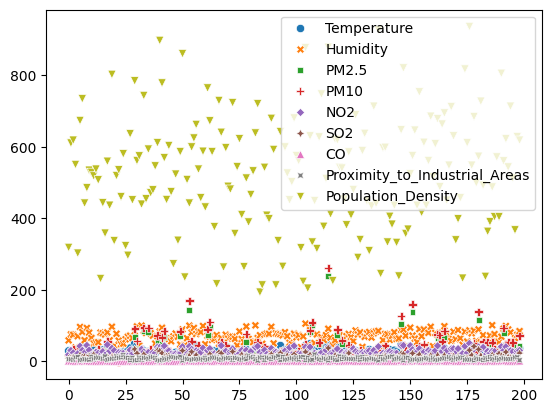

In [36]:
sns.scatterplot(data=df)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = pd.get_dummies(df.drop('Air Quality',axis=1))

In [39]:
y = df['Air Quality']

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [46]:
y_pred = knn_model.predict(scaled_X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[30,  0,  0,  0],
       [ 0,  5,  0,  1],
       [ 3,  0, 13,  0],
       [ 0,  3,  1,  4]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.91      1.00      0.95        30
   Hazardous       0.62      0.83      0.71         6
    Moderate       0.93      0.81      0.87        16
        Poor       0.80      0.50      0.62         8

    accuracy                           0.87        60
   macro avg       0.82      0.79      0.79        60
weighted avg       0.87      0.87      0.86        60



In [53]:
from sklearn.model_selection import cross_val_score
accset = cross_val_score(knn_model, X, y, cv=5)

print(accset)



[0.55       0.6        0.675      0.65       0.58974359]
